![DATE Header.jpg](attachment:d64f97f0-2424-4123-bc18-83e689731a30.jpg)
##  DEEP LEARNING INTERNSHIP PROGRAM

### GRADED Mini Project: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

### Import Required packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

DOWNLOAD & EXTRACT DATA FROM: https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip


* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [2]:
import requests
import zipfile
import io

# Download the dataset
url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall("/tmp/gtsrb")

# Define the path to the image sections
image_sections_path = "/tmp/gtsrb/FullIJCNN2013"

# Function to load images and labels
def load_traffic_signs(root_path):
    images = []
    labels = []
    # Iterate over all subfolders (each representing a class)
    for class_dir in sorted(os.listdir(root_path)):
        if os.path.isdir(os.path.join(root_path, class_dir)):
            class_path = os.path.join(root_path, class_dir)
            # Iterate over images in each class folder
            for img_name in sorted(os.listdir(class_path)):
                if img_name.endswith(".ppm"):
                    img_path = os.path.join(class_path, img_name)
                    try:
                        # Open and resize the image
                        img = Image.open(img_path)
                        img = img.resize((30, 30))
                        # Convert image to numpy array and flatten
                        img_array = np.array(img).flatten()
                        images.append(img_array)
                        # The class label is the folder name
                        labels.append(int(class_dir))
                    except Exception as e:
                        print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load the data from image sections
features, labels = load_traffic_signs(image_sections_path)

print(f"Shape of features: {features.shape}")
print(f"Shape of labels: {labels.shape}")

Shape of features: (1213, 2700)
Shape of labels: (1213,)


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

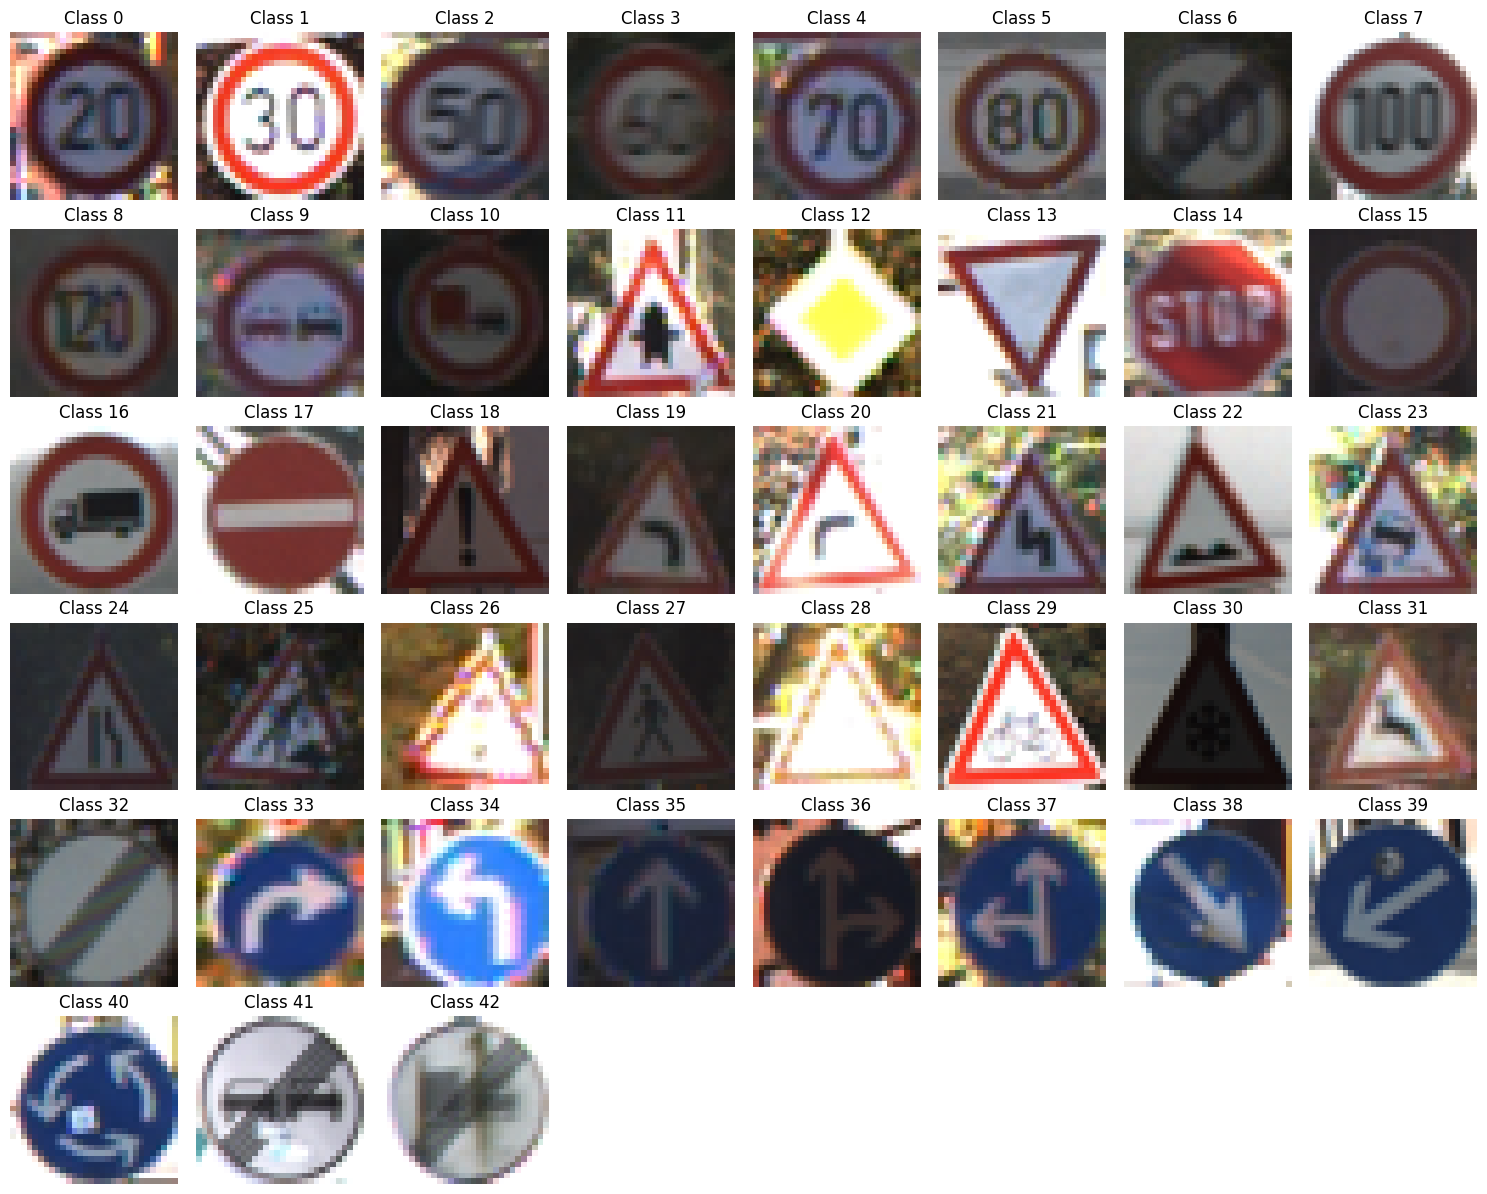

In [3]:
# Get unique labels and their first occurrences
unique_labels, indices = np.unique(labels, return_index=True)

# Determine the grid size for the subplots
n_classes = len(unique_labels)
n_cols = 8  # Number of columns in the grid
n_rows = (n_classes + n_cols - 1) // n_cols # Calculate the number of rows

plt.figure(figsize=(15, n_rows * 2)) # Adjust figure size based on number of rows

for i, label in enumerate(unique_labels):
    plt.subplot(n_rows, n_cols, i + 1)
    # Reshape the flattened image back to 30x30x3 (assuming RGB)
    img = features[indices[i]].reshape(30, 30, 3)
    plt.imshow(img)
    plt.title(f"Class {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Plot the distribution of Classes

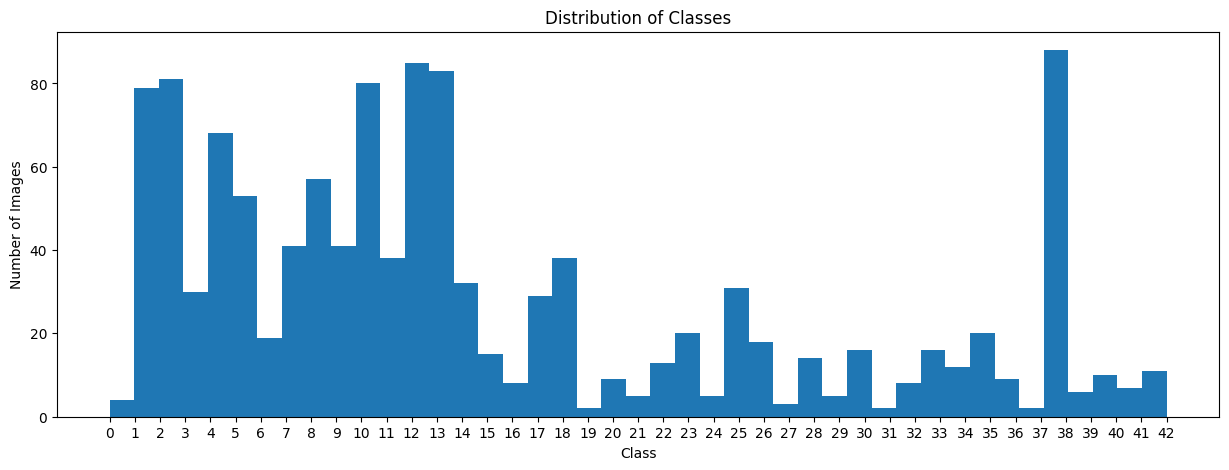

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.hist(labels, bins=len(unique_labels))
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(unique_labels)
plt.show()

#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [5]:
from sklearn.preprocessing import normalize

# Normalize the features
features_normalized = normalize(features)

print(f"Shape of normalized features: {features_normalized.shape}")

Shape of normalized features: (1213, 2700)


### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, labels, test_size=0.2, random_state=42)

# Initialize and train the MLP classifier
# Using default parameters for now, will tune later
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8024691358024691

Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.81      0.68        16
           2       0.63      0.75      0.69        16
           3       0.83      0.83      0.83         6
           4       0.91      0.67      0.77        15
           5       0.73      0.57      0.64        14
           6       0.86      1.00      0.92         6
           7       0.88      0.78      0.82         9
           8       0.92      0.86      0.89        14
           9       0.75      0.82      0.78        11
          10       0.88      0.94      0.91        16
          11       0.92      0.92      0.92        12
          12       0.78      1.00      0.88        18
          13       1.00      0.87      0.93        15
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         1
          17       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import uniform, randint
import numpy as np

# ✅ Scale/normalize the pixel values
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0

# ✅ Define parameter distributions for Randomized Search
param_dist = {
    'hidden_layer_sizes': [(100,), (200,), (100, 100), (200, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],  # 'adam' is faster and more stable than 'sgd'
    'alpha': uniform(1e-5, 1e-2),  # continuous range
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300]
}

# Initialize MLP with early stopping
mlp = MLPClassifier(random_state=42, early_stopping=True, n_iter_no_change=10)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=30,          # try 30 random combinations
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # use all CPU cores
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Evaluate on test set
best_mlp = random_search.best_estimator_
y_pred_tuned = best_mlp.predict(X_test_scaled)

print("\nClassification Report (Tuned MLP):")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix (Tuned MLP):")
print(confusion_matrix(y_test, y_pred_tuned))


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best parameters found:  {'activation': 'tanh', 'alpha': np.float64(0.00966255307264138), 'hidden_layer_sizes': (200, 100), 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'adam'}
Best cross-validation score:  0.09796595701308464

Classification Report (Tuned MLP):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        14
           9       0.00      0.00      0.00        11
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        12
          12       0.07      1.00      0.14        18
          13       0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Try the different algorithms and compare the results with MLP classifier

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train an SVM classifier
# Using a linear kernel for simplicity initially
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nSVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

# You can now compare these results with the MLP results

SVM Accuracy: 0.42386831275720166

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.56      0.46        16
           2       0.16      0.62      0.25        16
           3       0.00      0.00      0.00         6
           4       0.56      0.33      0.42        15
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         9
           8       0.50      0.21      0.30        14
           9       0.00      0.00      0.00        11
          10       0.67      0.88      0.76        16
          11       0.78      0.58      0.67        12
          12       0.47      1.00      0.64        18
          13       1.00      0.93      0.97        15
          14       1.00      0.83      0.91         6
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [9]:
print(tf.__version__)

2.19.0


In [10]:
# Step 1 - Build the architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Assuming input features are flattened (for images: 32x32x3 = 3072)
input_dim = X_train.shape[1]  # Number of input features

# Initialize the model
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(128, input_dim=input_dim, activation='relu'))

# Second hidden layer
model.add(Dense(64, activation='relu'))

# Output layer (for classification)
num_classes = len(np.unique(y_train))
model.add(Dense(num_classes, activation='softmax'))

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       345,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,779 (1.36 MB)

 Trainable params: 356,779 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Step 2 - Compile the model
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    loss='categorical_crossentropy',  # suitable for multi-class classification
    optimizer=Adam(learning_rate=0.001),  # adaptive optimizer
    metrics=['accuracy']  # track accuracy during training
)


In [12]:
# Step 3 - Fit and Evaluate the model
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=43)
y_test_cat = to_categorical(y_test, num_classes=43)

# Fit the model
history = model.fit(
    X_train, y_train_cat,
    epochs=20,            # number of passes over the data
    batch_size=64,        # number of samples per gradient update
    validation_split=0.2, # 20% of training data used for validation
    verbose=2
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=2)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/20
13/13 - 2s - 121ms/step - accuracy: 0.0644 - loss: 3.6895 - val_accuracy: 0.0825 - val_loss: 3.5890
Epoch 2/20
13/13 - 0s - 15ms/step - accuracy: 0.0773 - loss: 3.4932 - val_accuracy: 0.0979 - val_loss: 3.4521
Epoch 3/20
13/13 - 0s - 20ms/step - accuracy: 0.1418 - loss: 3.3567 - val_accuracy: 0.2062 - val_loss: 3.3640
Epoch 4/20
13/13 - 0s - 12ms/step - accuracy: 0.2358 - loss: 3.2656 - val_accuracy: 0.2216 - val_loss: 3.2779
Epoch 5/20
13/13 - 0s - 26ms/step - accuracy: 0.2358 - loss: 3.1936 - val_accuracy: 0.1753 - val_loss: 3.2194
Epoch 6/20
13/13 - 0s - 12ms/step - accuracy: 0.2062 - loss: 3.1251 - val_accuracy: 0.2268 - val_loss: 3.1598
Epoch 7/20
13/13 - 0s - 23ms/step - accuracy: 0.2526 - loss: 3.0451 - val_accuracy: 0.2732 - val_loss: 3.0795
Epoch 8/20
13/13 - 0s - 12ms/step - accuracy: 0.3196 - loss: 2.9520 - val_accuracy: 0.2629 - val_loss: 2.9756
Epoch 9/20
13/13 - 0s - 12ms/step - accuracy: 0.3080 - loss: 2.8494 - val_accuracy: 0.3144 - val_loss: 2.9009
Epoch 10/

#### Try the same parameters used for MLP Classifier and build the keras model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

# Parameters from the RandomizedSearchCV for MLP (approximated for Keras)
# 'hidden_layer_sizes': (200, 100) -> Two Dense layers with 200 and 100 units
# 'activation': 'tanh' -> tanh activation for hidden layers
# 'solver': 'adam' -> Use Adam optimizer
# 'alpha': 0.00966... -> Can be related to L2 regularization in Keras (kernel_regularizer)
# 'learning_rate': 'adaptive' -> Adam optimizer handles learning rate adaptively
# 'max_iter': 200 -> Corresponds to epochs in Keras (need to set a reasonable number)

input_dim = X_train.shape[1]  # Number of input features
num_classes = len(np.unique(y_train)) # Number of output classes

# Build the Keras model
model_keras_tuned = Sequential()

# Input layer and first hidden layer
model_keras_tuned.add(Dense(200, input_dim=input_dim, activation='tanh'))

# Second hidden layer
model_keras_tuned.add(Dense(100, activation='tanh'))

# Output layer
model_keras_tuned.add(Dense(num_classes, activation='softmax'))

# Compile the model
# Using Adam optimizer as suggested by the MLP parameters
# L2 regularization can be added to Dense layers to approximate 'alpha' if needed
model_keras_tuned.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(), # Default learning rate for Adam is 0.001, which is a good starting point
    metrics=['accuracy']
)

# Model summary
model_keras_tuned.summary()

# Convert labels to one-hot vectors
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Train the model
# Setting epochs to 200 as suggested by max_iter, but could use callbacks for early stopping
history_keras_tuned = model_keras_tuned.fit(
    X_train, y_train_cat,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    verbose=0 # Set verbose to 0 for less output during training
)

# Evaluate the model
test_loss_keras_tuned, test_accuracy_keras_tuned = model_keras_tuned.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nKeras Model Test Loss (Tuned Parameters): {test_loss_keras_tuned:.4f}")
print(f"Keras Model Test Accuracy (Tuned Parameters): {test_accuracy_keras_tuned:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 200)            │       540,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         4,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564,643 (2.15 MB)

 Trainable params: 564,643 (2.15 MB)

 Non-trainable params: 0 (0.00 B)


Keras Model Test Loss (Tuned Parameters): 0.4775
Keras Model Test Accuracy (Tuned Parameters): 0.8848


#### Experiment using Dropout, Regularization and Batch Normalization

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
import numpy as np

input_dim = X_train.shape[1]  # Number of input features
num_classes = len(np.unique(y_train)) # Number of output classes

# Build the Keras model with Dropout, Regularization, and Batch Normalization
model_keras_improved = Sequential()

# Input layer and first hidden layer with Batch Normalization and Dropout
model_keras_improved.add(Dense(200, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
model_keras_improved.add(BatchNormalization())
model_keras_improved.add(Dropout(0.3)) # Add dropout after activation and batch normalization

# Second hidden layer with Batch Normalization and Dropout
model_keras_improved.add(Dense(100, activation='relu', kernel_regularizer=l2(0.001)))
model_keras_improved.add(BatchNormalization())
model_keras_improved.add(Dropout(0.3))

# Output layer
model_keras_improved.add(Dense(num_classes, activation='softmax'))

# Compile the model
model_keras_improved.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Model summary
model_keras_improved.summary()

# Convert labels to one-hot vectors (if not already done)
# Assuming y_train_cat and y_test_cat are already created from previous steps
# If not, uncomment the following lines:
# y_train_cat = to_categorical(y_train, num_classes=num_classes)
# y_test_cat = to_categorical(y_test, num_classes=num_classes)


# Train the model
history_keras_improved = model_keras_improved.fit(
    X_train, y_train_cat,
    epochs=50, # You can adjust the number of epochs
    batch_size=64,
    validation_split=0.2,
    verbose=2 # Set verbose to 2 to see progress
)

# Evaluate the model
test_loss_keras_improved, test_accuracy_keras_improved = model_keras_improved.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nKeras Model Test Loss (Improved): {test_loss_keras_improved:.4f}")
print(f"Keras Model Test Accuracy (Improved): {test_accuracy_keras_improved:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 200)            │       540,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200)            │           800 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 43)             │         4,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 565,843 (2.16 MB)

 Trainable params: 565,243 (2.16 MB)

 Non-trainable params: 600 (2.34 KB)

Epoch 1/50
13/13 - 3s - 194ms/step - accuracy: 0.2242 - loss: 3.9044 - val_accuracy: 0.2680 - val_loss: 4.1871
Epoch 2/50
13/13 - 0s - 20ms/step - accuracy: 0.4446 - loss: 2.7199 - val_accuracy: 0.3299 - val_loss: 4.1264
Epoch 3/50
13/13 - 0s - 17ms/step - accuracy: 0.5580 - loss: 2.2077 - val_accuracy: 0.2577 - val_loss: 4.0765
Epoch 4/50
13/13 - 0s - 23ms/step - accuracy: 0.6340 - loss: 1.9349 - val_accuracy: 0.2526 - val_loss: 4.0267
Epoch 5/50
13/13 - 0s - 19ms/step - accuracy: 0.7113 - loss: 1.6558 - val_accuracy: 0.3041 - val_loss: 3.9785
Epoch 6/50
13/13 - 0s - 18ms/step - accuracy: 0.7552 - loss: 1.5042 - val_accuracy: 0.2938 - val_loss: 3.9302
Epoch 7/50
13/13 - 0s - 22ms/step - accuracy: 0.7912 - loss: 1.3748 - val_accuracy: 0.2371 - val_loss: 3.8840
Epoch 8/50
13/13 - 0s - 23ms/step - accuracy: 0.8273 - loss: 1.2307 - val_accuracy: 0.2835 - val_loss: 3.8189
Epoch 9/50
13/13 - 0s - 17ms/step - accuracy: 0.8183 - loss: 1.2291 - val_accuracy: 0.2835 - val_loss: 3.7698
Epoch 10/

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

Maximum Misclassifications: To determine the sign with the maximum misclassifications, you need to look at the confusion matrices from the MLP and Keras models. The confusion matrix shows how many images from each true class were predicted as other classes. You'll look for the rows with the largest off-diagonal values.


Optimal Parameters for Best Accuracy: The best accuracy was achieved by the basic Keras model (87.65%) followed by the Keras model with regularization (81.89%), and then the initial MLP (80.25%).
